In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [ ]:
#Input variables:
# bank client data:
#1 - age (numeric)
#2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
#3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
#4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
#5 - default: has credit in default? (categorical: 'no','yes','unknown')
#6 - housing: has housing loan? (categorical: 'no','yes','unknown')
#7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
#8 - contact: contact communication type (categorical: 'cellular','telephone')
#9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
#11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
#12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14 - previous: number of contacts performed before this campaign and for this client (numeric)
#15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
#16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#17 - cons.price.idx: consumer price index - monthly indicator (numeric)
#18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
#19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#20 - nr.employed: number of employees - quarterly indicator (numeric)

#Output variable (desired target):
#21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
df = pd.read_csv('bank-marketing.csv')

In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Tasks to Perform

#Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

pday is number of days that passed by after the client was last contacted from a previous campaign.

In [5]:
pdays = df['pdays']
print("Mean value is :",pdays.mean())
print("Median value is : ",pdays.median())
print("Minimum value is : ",pdays.min())

Mean value is : 40.19782796222158
Median value is :  -1.0
Minimum value is :  -1


 The values contains negetive numerics which cant be poosible according to the reference data provided it should contain positive numric values

#Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?


pdays column is a column where it is given when the customer is contacted lasttime 999 in numeric means customer is never contacted earlier. Here we are only interested in seeing the positive value the number of days last contacted. Ypou can also see that the mean value is 40 which is far from median value -1.

#Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?


In [6]:
x = df.groupby('education')['balance'].median().sort_values()

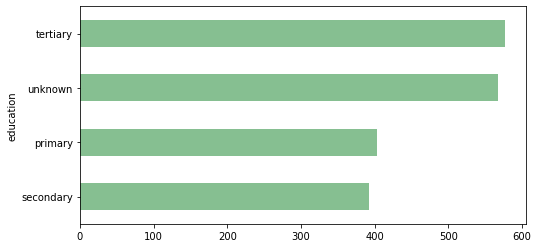

In [7]:
x.plot(kind='barh', figsize=(8, 4), color='#86bf91')


The group of tertiary has the the most median values

#Make a box plot for pdays. Do you see any outliers?


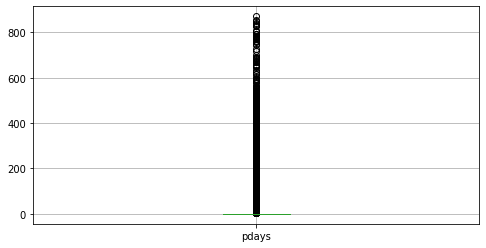

In [8]:
boxplot = df.boxplot(column=['pdays'], figsize=(8,4))


Yes there are many outliers in the pdays column


# The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.


In [9]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [11]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [12]:
df['response'].value_counts() #Target Counts Imbalanced DataSet 

no     39922
yes     5289
Name: response, dtype: int64

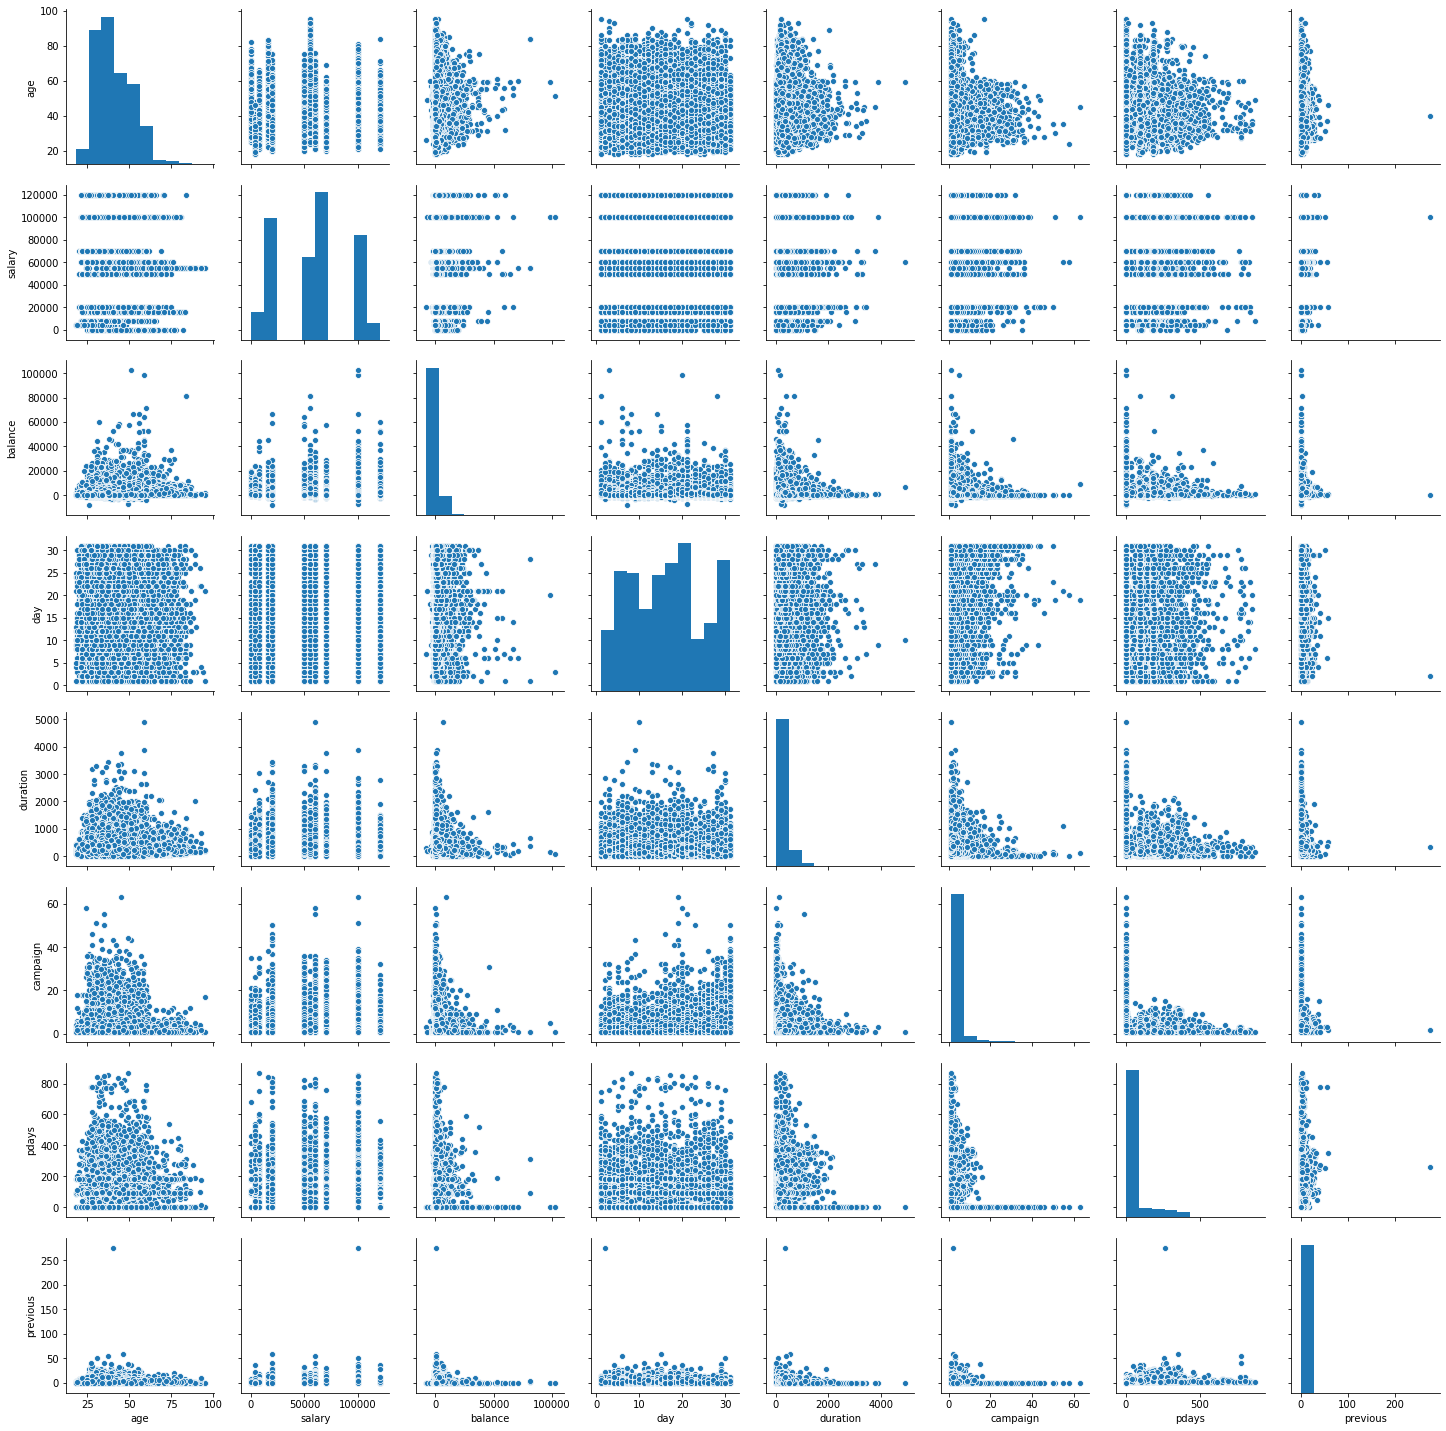

In [13]:
sns.pairplot(df)

We can observe that data here is not-symmetric. So lets find out the correlation matrix to look into details.

In [14]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


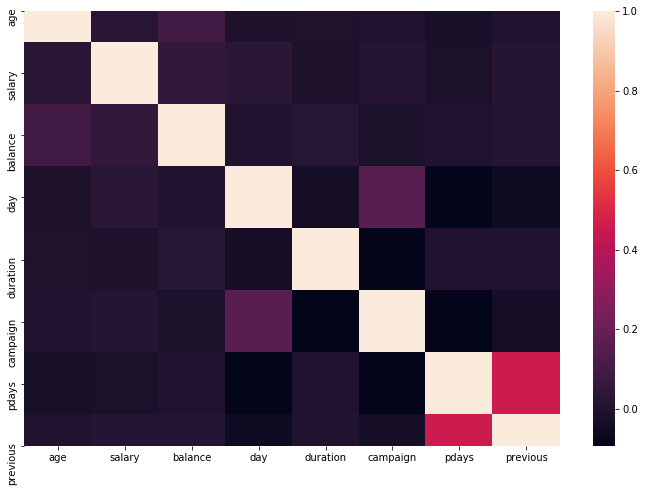

In [15]:
#finding the correlation among the variables
plt.figure(figsize = (12,8))
sns.heatmap(df.corr())

In [16]:
#Convert the response variable to a convenient form

df_new = pd.get_dummies(df, columns=['job', 'marital', 'education','targeted','default',
                                    'housing','loan','contact','month','poutcome'] )


In [17]:
#Class column into binary format
df_new.response.replace(to_replace=('yes','no'), value=(1,0),inplace = True)

In [18]:
df_new['response'].value_counts()

0    39922
1     5289
Name: response, dtype: int64

In [19]:
df_new.dtypes

age                    int64
salary                 int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
response               int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
targeted_no            uint8
targeted_yes           uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no       

In [20]:
df_new.isnull().sum()

age                    0
salary                 0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
response               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
targeted_no            0
targeted_yes           0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0


In [21]:
df_new

,age,salary,balance,day,duration,campaign,pdays,previous,response,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,100000,2143,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,60000,29,5,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,120000,2,5,76,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,20000,1506,5,92,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,5,198,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,55000,1729,17,456,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,55000,5715,17,1127,5,184,3,1,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,20000,668,17,508,4,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


Are the features about the previous campaign data useful?
- Not that much usefull


Are pdays and poutcome associated with the target? 

- It is not very useful to target variable and not adding any significance to the prediction.

In [70]:
# Features and Targets
y = pd.DataFrame(df_new['response'])
X = df_new.drop(['response','pdays'],axis=1)

pdays column is drop just because it contains maximum negetive value and cant be useful for feature selection

In [71]:
# data dividing for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 53)
(13564, 53)
(31647, 1)
(13564, 1)


# Predictive model 1: Logistic regression


In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logistic_mod = LogisticRegression()
logistic_mod.fit(X_train, y_train)

C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_predict = logistic_mod.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score

acc_logmodel = round(accuracy_score(y_predict, y_test) * 100)
print(acc_logmodel)

88.0


In [77]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[11769   200]
 [ 1362   233]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.54      0.15      0.23      1595

    accuracy                           0.88     13564
   macro avg       0.72      0.56      0.58     13564
weighted avg       0.85      0.88      0.85     13564



The precion is  0.90  , recall is  0.98 , f1-score is 0.94 , and the accuracy of the model is 88.

In [78]:
from sklearn.feature_selection import RFE

In [83]:
# create the RFE model and select 5 attributes
rfe = RFE(logistic_mod, 5)
rfe = rfe.fit(X,y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defaul

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False  True False False  True
  True False False  True False]
[47 49 48 43 45 32 42 41 35 26 19 39 15 37 36 11 38 20 28 33 17 44 18 22
 46 23 25 24 30 21 31  3 40 14 16 27  2 34  5  1 13  4  6 29  1 12  7  1
  1  8 10  1  9]


In [85]:
prediction=logistic_mod.predict(X_test)

In [86]:
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[ 2.56999479, -0.13019997,  3.16075093, ..., -1.93094078,
         3.26130366,  2.05692145],
       [ 0.34129317,  2.51321418, -0.80416572, ...,  6.24734437,
        -1.92769365,  2.9503149 ],
       [ 2.27539972,  3.36561455,  0.17164362, ...,  2.74693781,
         0.13492444,  2.00339547],
       ...,
       [ 0.5234359 ,  1.90466429,  0.93243365, ...,  1.53945231,
         1.90646166,  1.99458587],
       [ 1.33747921,  3.25859684,  0.78792366, ...,  5.18788314,
        -0.82071083,  3.51411431],
       [-0.98534299,  0.83919047,  2.5820803 , ...,  3.04705685,
         0.66885641,  3.32838496]])

Optimal number of features : 5


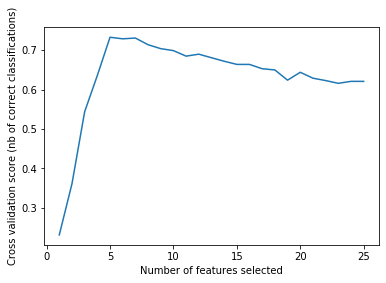

In [115]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using  informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=5,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [120]:
rfe = RFE(logistic_mod, 5)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

Num Features: 5
Selected Features: [False False False False  True False False  True False False False False
 False False False False False False False  True False  True False False
  True]
Feature Ranking: [21  9 19 13  1 18  8  1  2 10 14  6  5  4 20  3 12  7 16  1 11  1 17 15
  1]


C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Dragonor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

# Predictive model 2: Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=8)

In [96]:
rfc.fit(X_train, y_train)

C:\Users\Dragonor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [106]:
# Print the feature ranking on the basis of RandomForestClassifier

print("Feature ranking :")
for f in range(df_new.shape[1]):
    print("%d. %s: %f " % (f + 1, df_new.columns[indices[f]], importances[indices[f]]))

Feature ranking :
1. duration: 0.388641 
2. poutcome_failure: 0.158228 
3. age: 0.045465 
4. pdays: 0.038752 
5. default_no: 0.029375 
6. contact_cellular: 0.029044 
7. default_yes: 0.027125 
8. poutcome_other: 0.026251 
9. month_jul: 0.024029 
10. balance: 0.022313 
11. day: 0.020358 
12. month_nov: 0.020124 
13. month_may: 0.018889 
14. month_oct: 0.014067 
15. loan_no: 0.012522 
16. contact_telephone: 0.012477 
17. campaign: 0.009388 
18. month_jan: 0.009239 
19. month_sep: 0.007483 
20. salary: 0.007141 
21. month_jun: 0.006602 
22. housing_yes: 0.004814 
23. job_unknown: 0.004552 
24. month_feb: 0.004277 
25. contact_unknown: 0.004066 
26. response: 0.003715 
27. marital_divorced: 0.003685 
28. month_apr: 0.003211 
29. job_self-employed: 0.003130 
30. education_tertiary: 0.003034 
31. housing_no: 0.002961 
32. education_primary: 0.002836 
33. job_housemaid: 0.002794 
34. month_mar: 0.002630 
35. job_unemployed: 0.002294 
36. marital_married: 0.002235 
37. marital_single: 0.002151 

IndexError: index 53 is out of bounds for axis 0 with size 53

In [97]:
predict = rfc.predict(X_test)

In [98]:
accuracy_score(y_test, predict)

0.8953111176644057

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[11883    86]
 [ 1334   261]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.75      0.16      0.27      1595

    accuracy                           0.90     13564
   macro avg       0.83      0.58      0.61     13564
weighted avg       0.88      0.90      0.86     13564



In [108]:
acc_rfcmodel = round(accuracy_score(predict, y_test) * 100)
print(acc_rfcmodel)

90.0


The precision is 0.90, recall is 0.99, f1-score is 0.94, and the accuracy is 0.90

In [121]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

The Ranom forest is is performing good as compare to Logistic Regression